#NETFLIX PROJECT

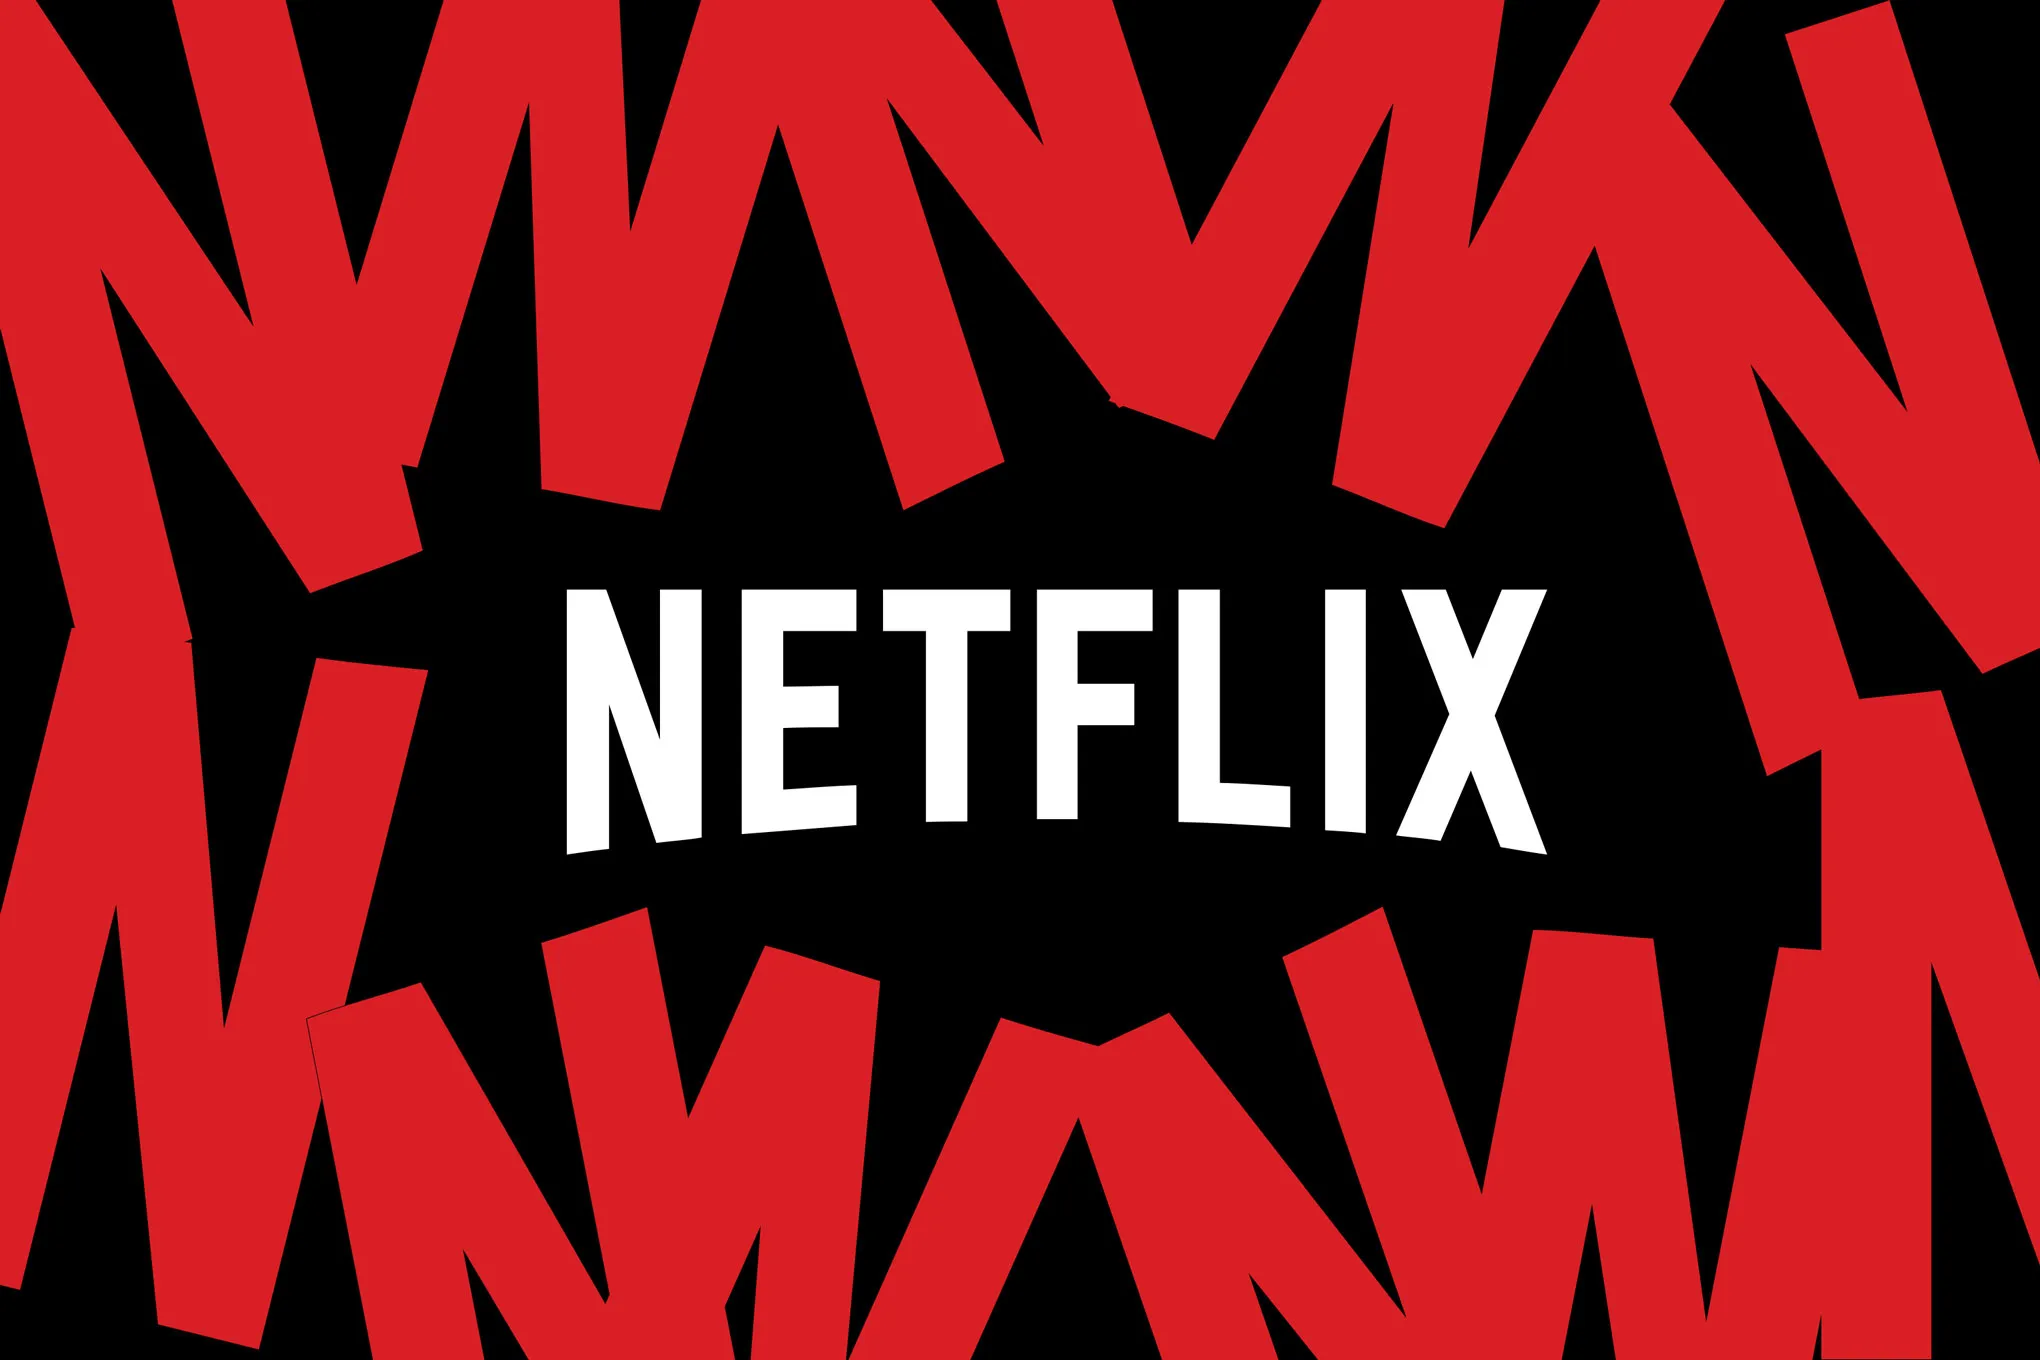

#1) IMPORTING DATA AND DATA EXPLORATION

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df = pd.read_csv('/mymoviedb.csv',lineterminator='\n')

In [21]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [23]:
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

checking duplicates

In [24]:
df.duplicated().sum()

np.int64(0)

checking statistical values

In [25]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#2) DATA CLEANING

REMOVING USELESS COLUMNS

In [38]:
del df['Overview']
del df['Original_Language']
del df['Poster_Url']

Adding new column as release year and converting release date to datetype

In [39]:
df['Release_Year'] = df['Release_Date'].str.split('-').str[0]

In [40]:
df['Release_Year'].astype('int')

,Release_Year
0,2021
1,2022
2,2022
3,2021
4,2021
...,...
9822,1973
9823,2020
9824,2016
9825,2021


DELETING RELEASE DATE COLUMN

In [41]:
df = df.drop('Release_Date', axis=1, errors='ignore')

In [42]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,Thriller,2022
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


converting column vote_average values into popular , avg ,below avg ,not popular

In [43]:
def categorize_col (df,col,labels):

        edges = [df[col].describe()['min'],
                 df[col].describe()['25%'],
                 df[col].describe()['50%'],
                 df[col].describe()['75%'],
                 df[col].describe()['max']]

        df[col] = pd.cut(df[col],edges,labels=labels,duplicates='drop')
        return df


In [44]:
labels = ['not popular','below avg','avg','popular']
df = categorize_col(df,'Vote_Average',labels)

df['Vote_Average'].unique()

['popular', 'below avg', 'avg', 'not popular', NaN]
Categories (4, object): ['not popular' < 'below avg' < 'avg' < 'popular']

In [45]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,below avg,Thriller,2022
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,avg,"Action, Adventure, Thriller, War",2021


REMOVING NULL VALUES FROM DATA

In [46]:
df.dropna(inplace=True)

checking null values again

In [47]:
df.isnull().sum()

,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


splitting genres and fixing them rowwise

In [48]:
df['Genre']=df['Genre'].str.split(', ')

df =df.explode('Genre').reset_index(drop=True)


In [49]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


# 3) DATA VISUALIZATION

In [50]:
sns.set_style('whitegrid')

# 4) KPI'S AND QUESTIONS

In [51]:
## what is the most frequent genre of movies released on netflix?

df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


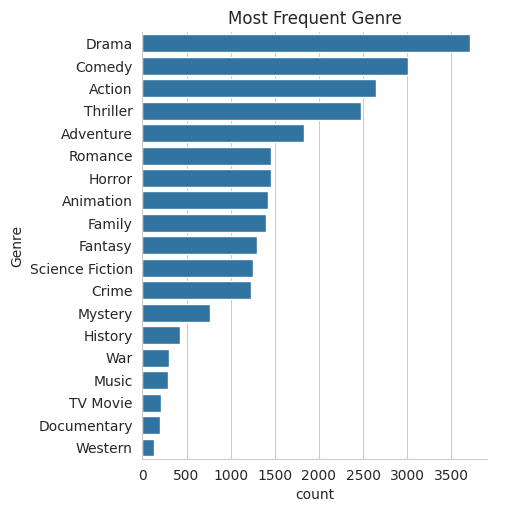

In [52]:
sns.catplot(y='Genre',data=df,kind='count',
            order= df['Genre'].value_counts().index)

plt.title('Most Frequent Genre')
plt.show()

In [53]:
## How many movies are popular ,avg and not popular ?

df['Vote_Average'].value_counts()

,count
Vote_Average,
avg,6613
popular,6520
below avg,6348
not popular,6071


In [54]:
df.columns

Index(['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre',
       'Release_Year'],
      dtype='object')

In [55]:
## which has the highest votes in vote avg column ?

df['Vote_Average'].value_counts().sort_values(ascending=False)

,count
Vote_Average,
avg,6613
popular,6520
below avg,6348
not popular,6071


for showing this question in category graph

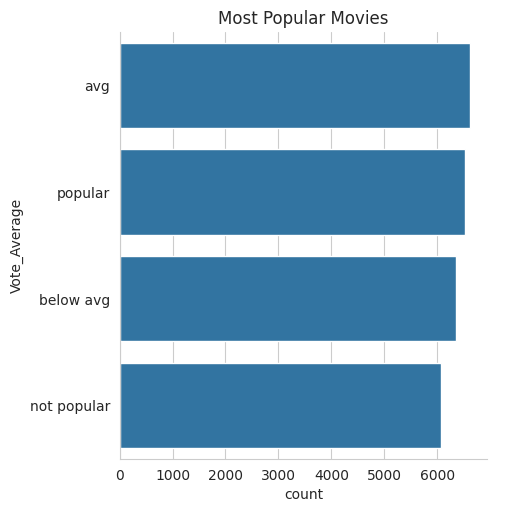

In [56]:
sns.catplot(y='Vote_Average',data = df,kind = 'count',
             order = df['Vote_Average'].value_counts().index)


plt.title('Most Popular Movies')
plt.show()

In [57]:
## what movie got the highest popularity? what it's genre?

df.groupby('Title')['Popularity'].max().sort_values(ascending=False)


,Popularity
Title,
Spider-Man: No Way Home,5083.954
The Batman,3827.658
No Exit,2618.087
Encanto,2402.201
The King's Man,1895.511
...,...
Badlands,13.357
Violent Delights,13.356
The Offering,13.355


In [58]:
df[df['Popularity'] == df['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


In [59]:
## what movie got the lowest popularity? what it's genre?

df[df['Popularity'] == df['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25546,The United States vs. Billie Holiday,13.354,152,avg,Music,2021
25547,The United States vs. Billie Holiday,13.354,152,avg,Drama,2021
25548,The United States vs. Billie Holiday,13.354,152,avg,History,2021
25549,Threads,13.354,186,popular,War,1984
25550,Threads,13.354,186,popular,Drama,1984
25551,Threads,13.354,186,popular,Science Fiction,1984


In [60]:

df.groupby('Title')['Popularity'].min().sort_values(ascending=True)

,Popularity
Title,
Threads,13.354
The United States vs. Billie Holiday,13.354
The Offering,13.355
Violent Delights,13.356
Badlands,13.357
...,...
The King's Man,1895.511
Encanto,2402.201
No Exit,2618.087


In [61]:
## Which year has the most filmed movies?


df['Release_Year'].value_counts().sort_values(ascending=False)

,count
Release_Year,
2021,1636
2018,1384
2017,1365
2019,1271
2016,1209
...,...
1920,4
1902,3
1925,2


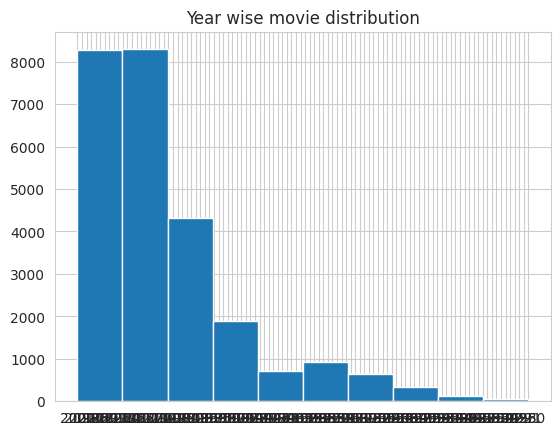

In [62]:
# for making graph
df['Release_Year'].hist()
plt.title('Year wise movie distribution')
plt.show()

In [63]:
df['Popularity']=df['Popularity'].drop_duplicates()

In [64]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,NaN,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,NaN,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,NaN,1151,popular,Mystery,2022


CONCLUSION

.**Genre popularity:** You've identified 'Drama' as the most frequent genre. This suggests that focusing on or analyzing drama movies could be a good starting point.

**.Popularity Distribution:** You've categorized movies into popularity levels ('not popular', 'below avg', 'avg', 'popular'). Further analysis could focus on the characteristics of 'popular' movies to understand what makes them successful.

**.Release Year Trends:** You've looked at the distribution of movies by release year. Analyzing the popularity or vote average trends over the years could reveal interesting insights about how movie preferences have evolved.